<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data(y_hat)_multi_delta_(0)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_0'

In [4]:
os.listdir(base_path)

['data_multi_delta_0_n250.csv',
 'data_multi_delta_0_n120.csv',
 'data_multi_delta_0_n60.csv',
 'data_multi_delta_0_n30.csv',
 'data_multi_delta_0_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,75.125241,84.922404,34.972066,68.259011,-0.363912,272.914810,273.335423,-0.420613
1,0.0,1.0,25.707258,75.671899,78.801281,77.725542,-0.845719,267.060261,267.685673,-0.625413
2,0.0,2.0,93.961521,94.415264,37.686187,75.730122,0.292766,312.085860,311.969362,0.116498
3,0.0,3.0,64.134941,35.627512,20.932261,37.451962,-0.773438,167.373238,168.179917,-0.806679
4,0.0,4.0,60.575248,93.071781,52.078179,38.832006,0.375342,254.932555,254.475315,0.457240
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,93.142144,21.647726,28.303506,66.690736,-0.939674,218.844438,219.760792,-0.916355
249996,999.0,246.0,51.993810,73.718794,35.008163,62.642083,1.102634,234.465483,233.534923,0.930560
249997,999.0,247.0,73.384466,90.437758,47.227303,48.878704,1.317432,271.245663,270.212957,1.032706
249998,999.0,248.0,90.516651,20.235445,55.927670,65.625684,-0.254542,242.050907,242.284173,-0.233266


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,75.125241,84.922404,34.972066,68.259011,-0.363912,272.914810,273.335423,-0.420613
1,0.0,1.0,25.707258,75.671899,78.801281,77.725542,-0.845719,267.060261,267.685673,-0.625413
2,0.0,2.0,93.961521,94.415264,37.686187,75.730122,0.292766,312.085860,311.969362,0.116498
3,0.0,3.0,64.134941,35.627512,20.932261,37.451962,-0.773438,167.373238,168.179917,-0.806679
4,0.0,4.0,60.575248,93.071781,52.078179,38.832006,0.375342,254.932555,254.475315,0.457240
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,93.142144,21.647726,28.303506,66.690736,-0.939674,218.844438,219.760792,-0.916355
249996,999.0,246.0,51.993810,73.718794,35.008163,62.642083,1.102634,234.465483,233.534923,0.930560
249997,999.0,247.0,73.384466,90.437758,47.227303,48.878704,1.317432,271.245663,270.212957,1.032706
249998,999.0,248.0,90.516651,20.235445,55.927670,65.625684,-0.254542,242.050907,242.284173,-0.233266


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    75.125241  84.922404  34.972066  68.259011 -0.363912  272.914810   
      1.0    25.707258  75.671899  78.801281  77.725542 -0.845719  267.060261   
      2.0    93.961521  94.415264  37.686187  75.730122  0.292766  312.085860   
      3.0    64.134941  35.627512  20.932261  37.451962 -0.773438  167.373238   
      4.0    60.575248  93.071781  52.078179  38.832006  0.375342  254.932555   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  93.142144  21.647726  28.303506  66.690736 -0.939674  218.844438   
      246.0  51.993810  73.718794  35.008163  62.642083  1.102634  234.465483   
      247.0  73.384466  90.437758  47.227303  48.878704  1.317432  271.245663   
      248.0  90.516651  20.235445  55.927670  65.625684 -0.254542  242.050907   
      249.0  30.383457  46.995649  92.747817  23.940444  0.390660  204.458026   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    273.335423 -0.420613  
      1.0    267.685673 -0.625413  
      2.0    311.969362  0.116498  
      3.0    168.179917 -0.806679  
      4.0    254.475315  0.457240  
...                 ...       ...  
999.0 245.0  219.760792 -0.916355  
      246.0  233.534923  0.930560  
      247.0  270.212957  1.032706  
      248.0  242.284173 -0.233266  
      249.0  204.233092  0.224934  

[250000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    75.125241  84.922404  34.972066  68.259011 -0.363912  272.914810   
      1.0    25.707258  75.671899  78.801281  77.725542 -0.845719  267.060261   
      2.0    93.961521  94.415264  37.686187  75.730122  0.292766  312.085860   
      3.0    64.134941  35.627512  20.932261  37.451962 -0.773438  167.373238   
      4.0    60.575248  93.071781  52.078179  38.832006  0.375342  254.932555   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  93.142144  21.647726  28.303506  66.690736 -0.939674  218.844438   
      246.0  51.993810  73.718794  35.008163  62.642083  1.102634  234.465483   
      247.0  73.384466  90.437758  47.227303  48.878704  1.317432  271.245663   
      248.0  90.516651  20.235445  55.927670  65.625684 -0.254542  242.050907   
      249.0  30.383457  46.995649  92.747817  23.940444  0.390660  204.458026   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    273.335423 -0.420613  
      1.0    267.685673 -0.625413  
      2.0    311.969362  0.116498  
      3.0    168.179917 -0.806679  
      4.0    254.475315  0.457240  
...                 ...       ...  
999.0 245.0  219.760792 -0.916355  
      246.0  233.534923  0.930560  
      247.0  270.212957  1.032706  
      248.0  242.284173 -0.233266  
      249.0  204.233092  0.224934  

[250000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,75.125241,84.922404,34.972066,68.259011,-0.363912,272.914810,273.335423,-0.420613
1,0.0,1.0,25.707258,75.671899,78.801281,77.725542,-0.845719,267.060261,267.685673,-0.625413
2,0.0,2.0,93.961521,94.415264,37.686187,75.730122,0.292766,312.085860,311.969362,0.116498
3,0.0,3.0,64.134941,35.627512,20.932261,37.451962,-0.773438,167.373238,168.179917,-0.806679
4,0.0,4.0,60.575248,93.071781,52.078179,38.832006,0.375342,254.932555,254.475315,0.457240
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,93.142144,21.647726,28.303506,66.690736,-0.939674,218.844438,219.760792,-0.916355
249996,999.0,246.0,51.993810,73.718794,35.008163,62.642083,1.102634,234.465483,233.534923,0.930560
249997,999.0,247.0,73.384466,90.437758,47.227303,48.878704,1.317432,271.245663,270.212957,1.032706
249998,999.0,248.0,90.516651,20.235445,55.927670,65.625684,-0.254542,242.050907,242.284173,-0.233266


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    75.125241  84.922404  34.972066  68.259011 -0.363912  272.914810   
      1.0    25.707258  75.671899  78.801281  77.725542 -0.845719  267.060261   
      2.0    93.961521  94.415264  37.686187  75.730122  0.292766  312.085860   
      3.0    64.134941  35.627512  20.932261  37.451962 -0.773438  167.373238   
      4.0    60.575248  93.071781  52.078179  38.832006  0.375342  254.932555   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  93.142144  21.647726  28.303506  66.690736 -0.939674  218.844438   
      246.0  51.993810  73.718794  35.008163  62.642083  1.102634  234.465483   
      247.0  73.384466  90.437758  47.227303  48.878704  1.317432  271.245663   
      248.0  90.516651  20.235445  55.927670  65.625684 -0.254542  242.050907   
      249.0  30.383457  46.995649  92.747817  23.940444  0.390660  204.458026   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    273.335423 -0.420613  
      1.0    267.685673 -0.625413  
      2.0    311.969362  0.116498  
      3.0    168.179917 -0.806679  
      4.0    254.475315  0.457240  
...                 ...       ...  
999.0 245.0  219.760792 -0.916355  
      246.0  233.534923  0.930560  
      247.0  270.212957  1.032706  
      248.0  242.284173 -0.233266  
      249.0  204.233092  0.224934  

[250000 rows x 8 columns]

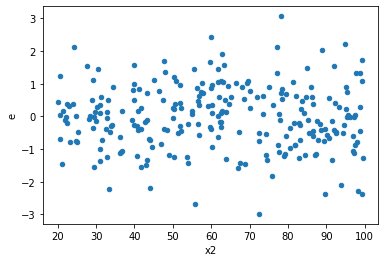

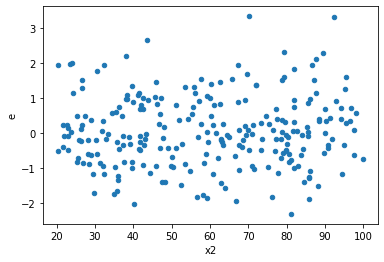

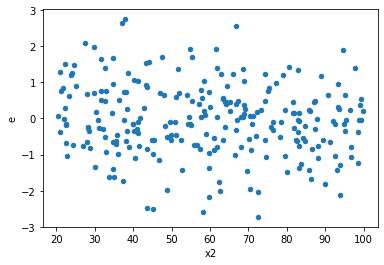

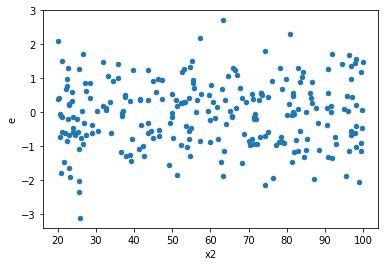

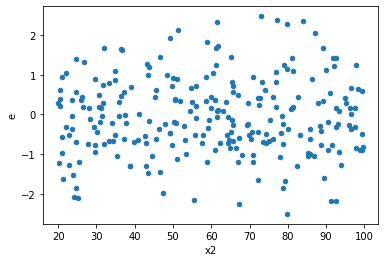

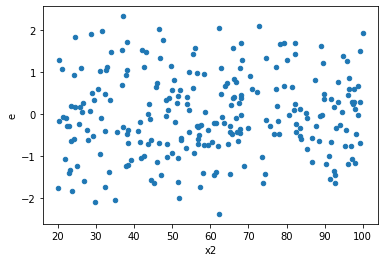

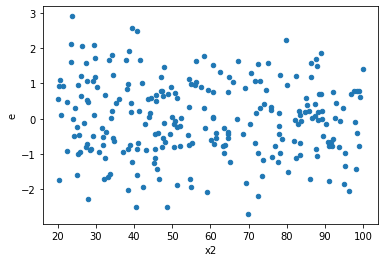

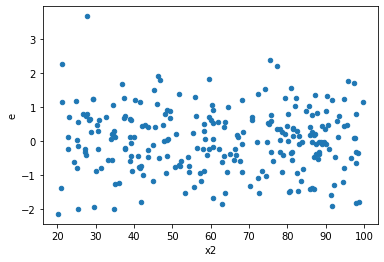

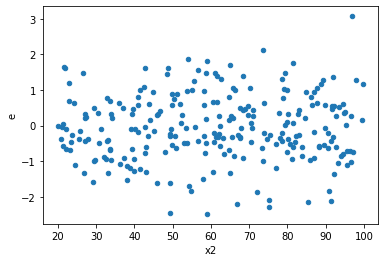

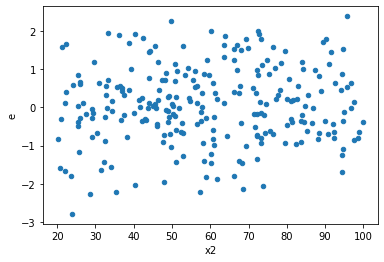

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,96.0,96.0,69.53226676581356,98.85769213699527,0.7242944454772245,1.0297676264270341,1.4217527593333106,0.08634024141710572,0.9568298792914471,0.04317012070855286,Reject005=1 : Homoscedasticity
5.0,96.0,96.0,72.88704833761363,87.68099004008273,0.759240086850142,0.9133436462508618,1.2029707889108556,0.3668928289305273,0.8165535855347363,0.18344641446526366,Reject005=1 : Homoscedasticity
7.0,96.0,96.0,93.58057529696816,116.41746077302226,0.9747976593434183,1.2126818830523152,1.2440344633871252,0.28646735407622614,0.8567663229618869,0.14323367703811307,Reject005=1 : Homoscedasticity
8.0,96.0,96.0,85.61545311070343,112.49142565576716,0.8918276365698273,1.1717856839142413,1.3139149717553007,0.18287974841420063,0.9085601257928997,0.09143987420710031,Reject005=1 : Homoscedasticity
10.0,96.0,96.0,82.78353133283338,93.73891590094765,0.862328451383681,0.9764470406348713,1.1323377293977452,0.5437925737250306,0.7281037131374847,0.2718962868625153,Reject005=1 : Homoscedasticity
14.0,96.0,96.0,88.53103829785998,93.81171990102746,0.9221983156027082,0.9772054156357027,1.0596477992882087,0.7771214538077742,0.6114392730961129,0.3885607269038871,Reject005=1 : Homoscedasticity
17.0,96.0,96.0,75.79124924582163,88.95491708161374,0.7894921796439753,0.9266137196001432,1.1736832149724439,0.4341562153834255,0.7829218923082872,0.21707810769171276,Reject005=1 : Homoscedasticity
18.0,96.0,96.0,71.336659393807,94.23486311904706,0.7430902020188229,0.9816131574900736,1.3209878892538658,0.17444795803196245,0.9127760209840188,0.08722397901598122,Reject005=1 : Homoscedasticity
19.0,96.0,96.0,94.78695966429457,102.03199653998011,0.9873641631697351,1.0628332972914596,1.076434953725124,0.7189567305146514,0.6405216347426743,0.3594783652573257,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,96.0,96.0,91.51231379724322,75.60466781070645,0.9532532687212836,0.7875486230281922,0.8261693391144921,0.35115635109191123,Reject005=1 : Homoscedasticity
1.0,96.0,96.0,69.53226676581356,98.85769213699527,0.7242944454772245,1.0297676264270341,1.4217527593333106,0.08634024141710572,Reject005=1 : Homoscedasticity
2.0,96.0,96.0,120.88046912261315,109.71340714801175,1.2591715533605536,1.1428479911251224,0.9076189722321951,0.6358324434764506,Reject005=1 : Homoscedasticity
3.0,96.0,96.0,92.5851266766101,91.97642755863271,0.9644284028813552,0.9580877870690907,0.9934255194130315,0.9742882194460231,Reject005=1 : Homoscedasticity
4.0,96.0,96.0,119.14649671845723,101.39852651594103,1.2411093408172629,1.056234651207719,0.8510407717278117,0.43087127007011444,Reject005=1 : Homoscedasticity
5.0,96.0,96.0,72.88704833761363,87.68099004008273,0.759240086850142,0.9133436462508618,1.2029707889108556,0.3668928289305273,Reject005=1 : Homoscedasticity
6.0,96.0,96.0,93.99054715898613,90.31806086130662,0.9790681995727722,0.940813133971944,0.9609270675755568,0.845593963578667,Reject005=1 : Homoscedasticity
7.0,96.0,96.0,93.58057529696816,116.41746077302226,0.9747976593434183,1.2126818830523152,1.2440344633871252,0.28646735407622614,Reject005=1 : Homoscedasticity
8.0,96.0,96.0,85.61545311070343,112.49142565576716,0.8918276365698273,1.1717856839142413,1.3139149717553007,0.18287974841420063,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      951
Reject005=0 : Heteroscedasticity     49
Name: Result_test, dtype: int64